In [1]:
#Librarys
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggrepel))

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [2]:
#Adjusting the size of plot
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 100)

#Disabling warning messages
options(warn=-1)

In [3]:
#Reading data
imdb_movies <- read_csv('IMDb_movies.csv', col_types = cols())

#Selecting all the columns except actors and description
imdb_movies <- imdb_movies %>% select(-actors, -description)

head(imdb_movies)

imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NA,Charles Tait,Charles Tait,J. and N. Tait,6.1,537,$ 2250,NA,NA,NA,7,7
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NA,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,5.9,171,NA,NA,NA,NA,4,2
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,5.2,420,$ 45000,NA,NA,NA,24,3
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,7.0,2019,NA,NA,NA,NA,28,14
tt0002199,"From the Manger to the Cross; or, Jesus of Nazareth","From the Manger to the Cross; or, Jesus of Nazareth",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,5.7,438,NA,NA,NA,NA,12,5
tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),6.8,709,NA,NA,NA,NA,11,9


In [4]:
#Dataframe Struture
str(imdb_movies)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	81273 obs. of  20 variables:
 $ imdb_title_id        : chr  "tt0000574" "tt0001892" "tt0002101" "tt0002130" ...
 $ title                : chr  "The Story of the Kelly Gang" "Den sorte drøm" "Cleopatra" "L'Inferno" ...
 $ original_title       : chr  "The Story of the Kelly Gang" "Den sorte drøm" "Cleopatra" "L'Inferno" ...
 $ year                 : num  1906 1911 1912 1911 1912 ...
 $ date_published       : chr  "1906-12-26" "1911-08-19" "1912-11-13" "1911-03-06" ...
 $ genre                : chr  "Biography, Crime, Drama" "Drama" "Drama, History" "Adventure, Drama, Fantasy" ...
 $ duration             : num  70 53 100 68 60 85 120 120 55 121 ...
 $ country              : chr  "Australia" "Germany, Denmark" "USA" "Italy" ...
 $ language             : chr  NA NA "English" "Italian" ...
 $ director             : chr  "Charles Tait" "Urban Gad" "Charles L. Gaskill" "Francesco Bertolini, Adolfo Padovan" ...
 $ writer               : c

In [5]:
#Columns names
print(names(imdb_movies))

 [1] "imdb_title_id"         "title"                 "original_title"       
 [4] "year"                  "date_published"        "genre"                
 [7] "duration"              "country"               "language"             
[10] "director"              "writer"                "production_company"   
[13] "avg_vote"              "votes"                 "budget"               
[16] "usa_gross_income"      "worlwide_gross_income" "metascore"            
[19] "reviews_from_users"    "reviews_from_critics" 


In [6]:
#Reading data
oscar_award <- read_csv('the_oscar_award.csv', col_types=cols())

head(oscar_award)

year_film,year_ceremony,ceremony,category,name,film,winner
1927,1928,1,ACTOR,Richard Barthelmess,The Noose,FALSE
1927,1928,1,ACTOR,Emil Jannings,The Last Command,TRUE
1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,FALSE
1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,TRUE
1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,FALSE
1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,FALSE


In [7]:
#Dataframe Struture
str(oscar_award)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	10395 obs. of  7 variables:
 $ year_film    : num  1927 1927 1927 1927 1927 ...
 $ year_ceremony: num  1928 1928 1928 1928 1928 ...
 $ ceremony     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ category     : chr  "ACTOR" "ACTOR" "ACTRESS" "ACTRESS" ...
 $ name         : chr  "Richard Barthelmess" "Emil Jannings" "Louise Dresser" "Janet Gaynor" ...
 $ film         : chr  "The Noose" "The Last Command" "A Ship Comes In" "7th Heaven" ...
 $ winner       : logi  FALSE TRUE FALSE TRUE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   year_film = col_double(),
  ..   year_ceremony = col_double(),
  ..   ceremony = col_double(),
  ..   category = col_character(),
  ..   name = col_character(),
  ..   film = col_character(),
  ..   winner = col_logical()
  .. )


In [8]:
#Personalized theme to columns
theme_perso_col <- function(name){
    if(missing(name)){
        theme_light() +
        theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100"),
            legend.position = 'right')
    }else if(name=='angle90'){
        theme_light() +
        theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))
    }
}

# Distribution of movies per year

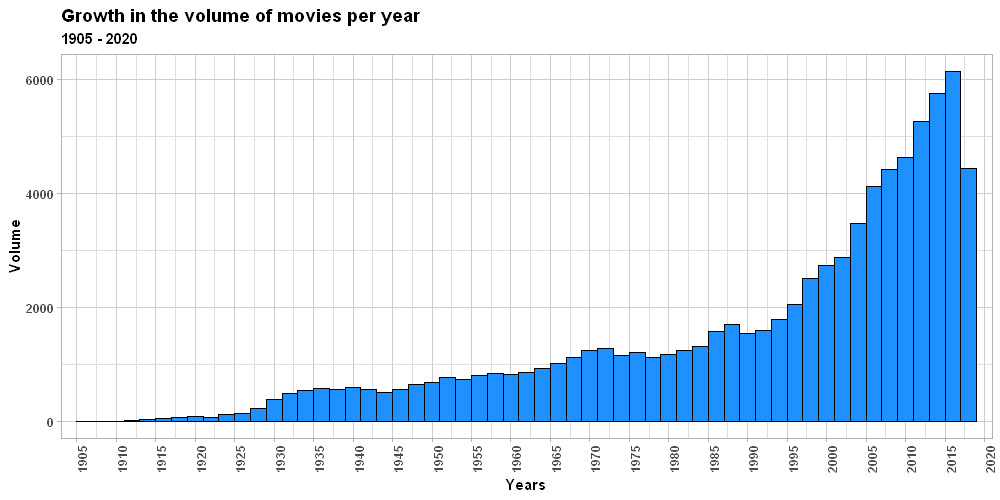

In [9]:
imdb_movies %>% 
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        scale_x_continuous(breaks = seq(1905, 2020, 5), expand = c(0,2)) +
        labs(title = "Growth in the volume of movies per year",
             subtitle = '1905 - 2020',
            x = "Years", y = "Volume") +
        theme_perso_col('angle90')

# Predominants countries in cinema in the 1905s - 1950s

In [10]:
#Function to plotting
country_movie <- function(start, end, top){
    imdb_movies %>%
        filter(year %in% c(start, end)) %>%
        group_by(country) %>%
        count() %>%
        arrange(-n) %>%
        head(top) %>%
        ggplot(aes(x = reorder(country, -n), y = n, fill = country)) +
            geom_bar(stat = 'identity') +
            scale_fill_viridis_d() +
            labs(title = 'Quantity of the movies per country',
                subtitle =  paste0(start, ' - ', end) ,
                y = 'Quantity', x = 'Countries', fill = 'Countries') +
            theme_perso_col('angle90')
}

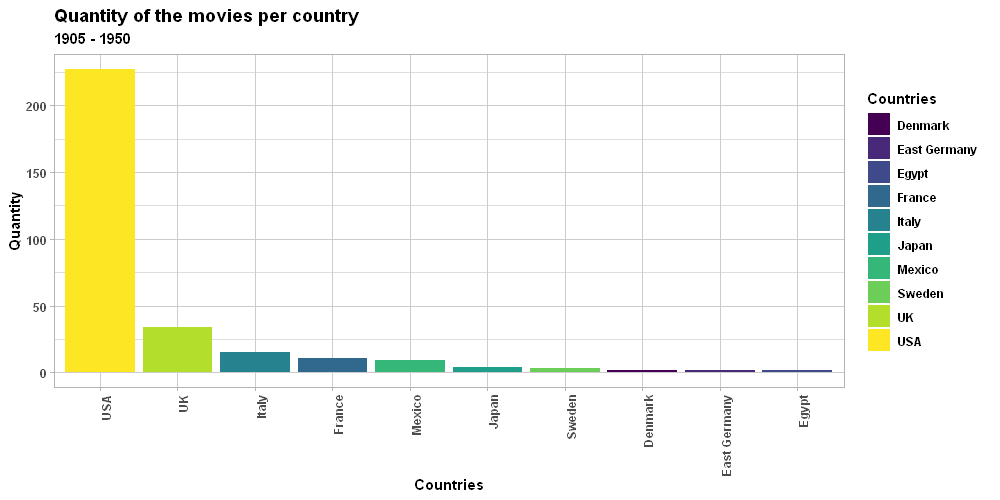

In [11]:
country_movie(1905,1950,10)

# Predominants countries in cinema in the 1951s - 2020s

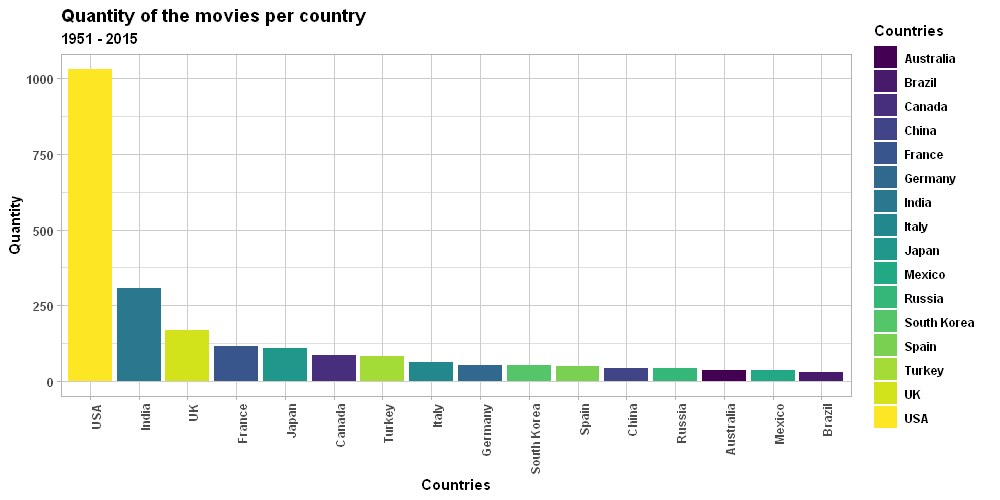

In [12]:
country_movie(1951,2015,16)

# Genres

In [13]:
genres <- imdb_movies %>%
            select(genre) %>%
            group_by(genre) %>%
            count() %>%
            filter(n > 500) %>%
            arrange(-n)
genres

genre,n
Drama,11809
Comedy,7322
"Comedy, Drama",3822
"Drama, Romance",3252
"Comedy, Romance",2383
Horror,2189
"Comedy, Drama, Romance",2172
"Crime, Drama",1277
"Drama, Thriller",1270
"Action, Crime, Drama",1241


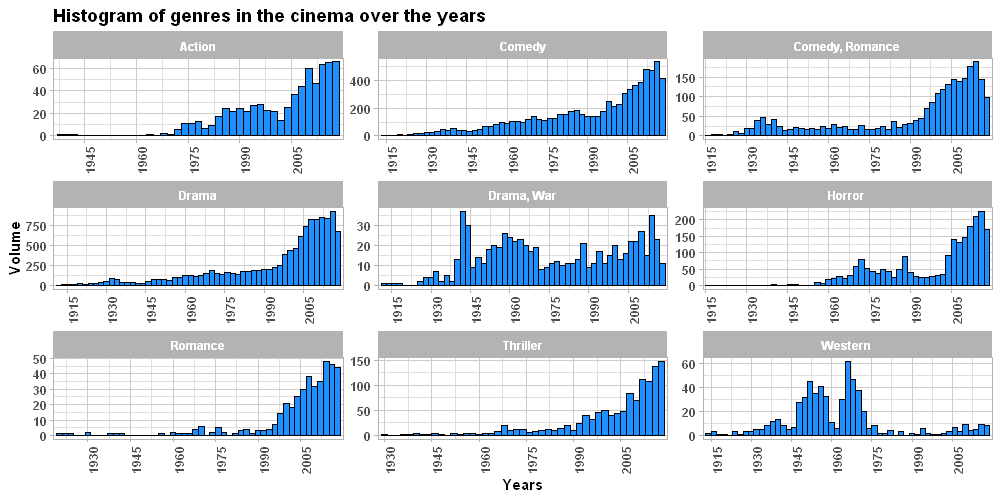

In [14]:
principal_genres <- c('Drama', 'Comedy', 'Horror', 'Action', 
                      'Western', 'Thriller', 'Drama, War', 'Romance', 'Comedy, Romance')

imdb_movies %>% 
        filter(genre %in% principal_genres) %>%
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        facet_wrap(~ genre, scale = "free", shrink = TRUE) +
        scale_x_continuous(breaks = seq(1900, 2015, 15), expand = c(0,1)) +
        labs(title = "Histogram of genres in the cinema over the years",
            x = "Years", y = "Volume") +
        theme_perso_col('angle90')

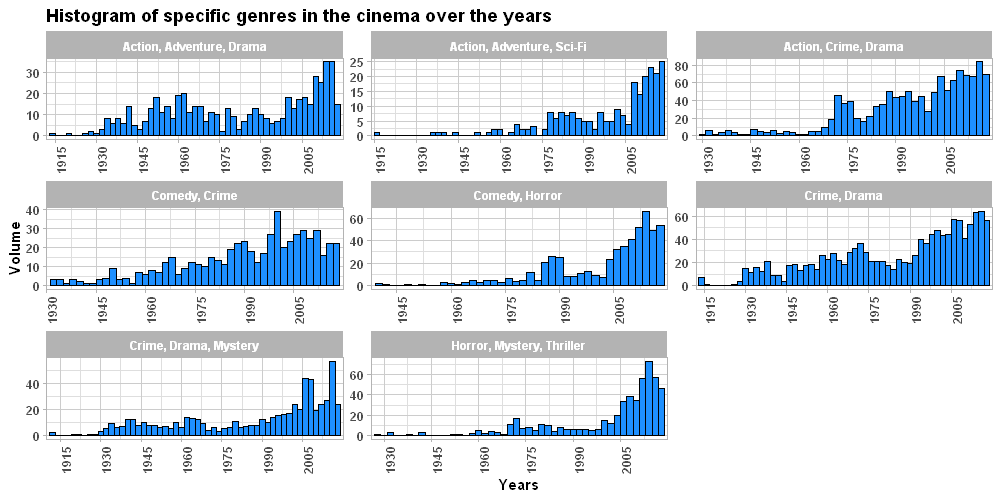

In [15]:
others_genres <- c('Crime, Drama, Mystery', 'Crime, Drama', 'Action, Crime, Drama', 
                   'Action, Adventure, Drama', 'Horror, Mystery, Thriller', 'Comedy, Horror', 'Comedy, Crime',
                  'Action, Adventure, Sci-Fi')

imdb_movies %>% 
        filter(genre %in% others_genres) %>%
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        facet_wrap(~ genre, scale = "free", shrink = TRUE) +
        scale_x_continuous(breaks = seq(1900, 2015, 15), expand = c(0,1)) +
        labs(title = "Histogram of specific genres in the cinema over the years",
            x = "Years", y = "Volume") +
        theme_perso_col('angle90')

# Analysis of the biggest box office of the last decades

In [16]:
#Dataframe without missing values
imdb_movies.omit <- na.omit(imdb_movies)

#Removing the symbol '$' from worlwide_gross_income column
worlwide_gross_income_new <- str_replace_all(imdb_movies.omit$worlwide_gross_income, fixed('$'), '')

#Converting worlwide_gross_income column to numeric
imdb_movies.omit$worlwide_gross_income <- as.numeric(worlwide_gross_income_new)

In [17]:
#Function to plotting
boxoffice_movies <- function(start, end, top){
    imdb_movies.omit %>%
        filter(year %in% seq(start, end)) %>%
        select(title, worlwide_gross_income, genre) %>%
        arrange(-worlwide_gross_income) %>%
        head(top) %>%
        ggplot(aes(x = title, y = worlwide_gross_income, fill = factor(genre))) +
        geom_bar(stat='identity') +
        scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Highest box offices over the year',
             subtitle = paste0(start, ' - ', end),
            x = 'Movies', y = 'Dollars (millions)',
            fill='Genre') +
        coord_flip() +
        theme_perso_col()
}

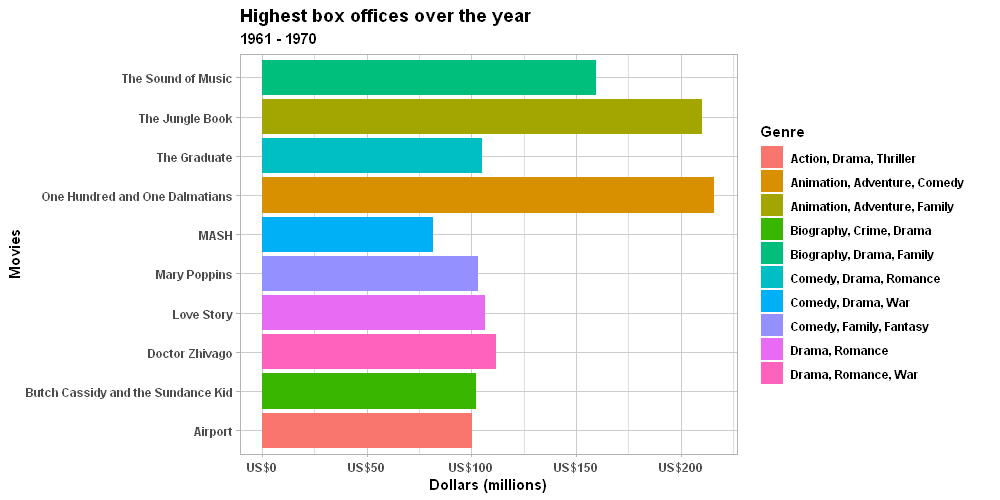

In [18]:
boxoffice_movies(1961,1970,10)

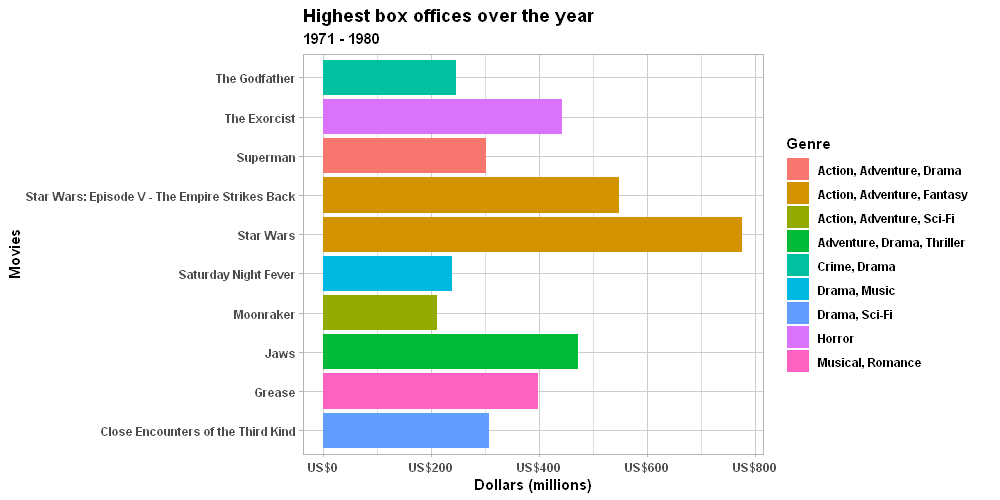

In [19]:
boxoffice_movies(1971,1980,10)

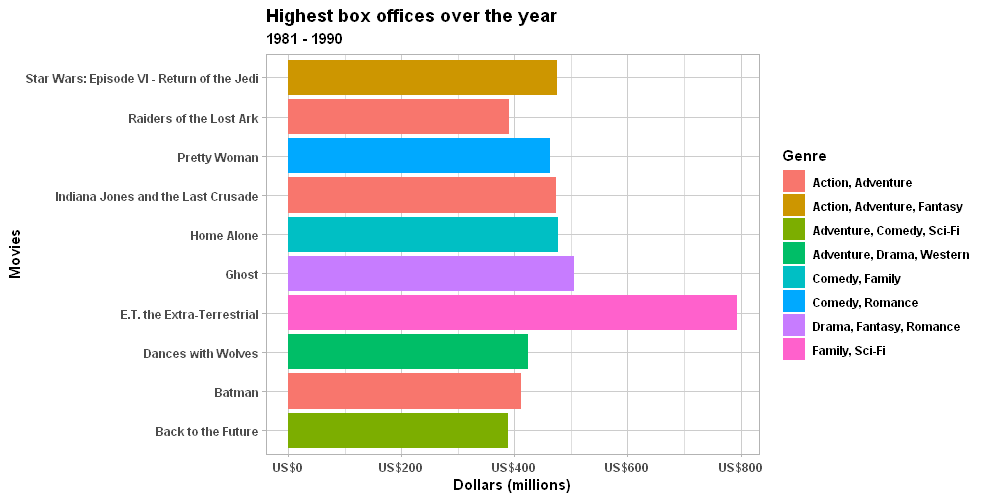

In [20]:
boxoffice_movies(1981,1990,10)

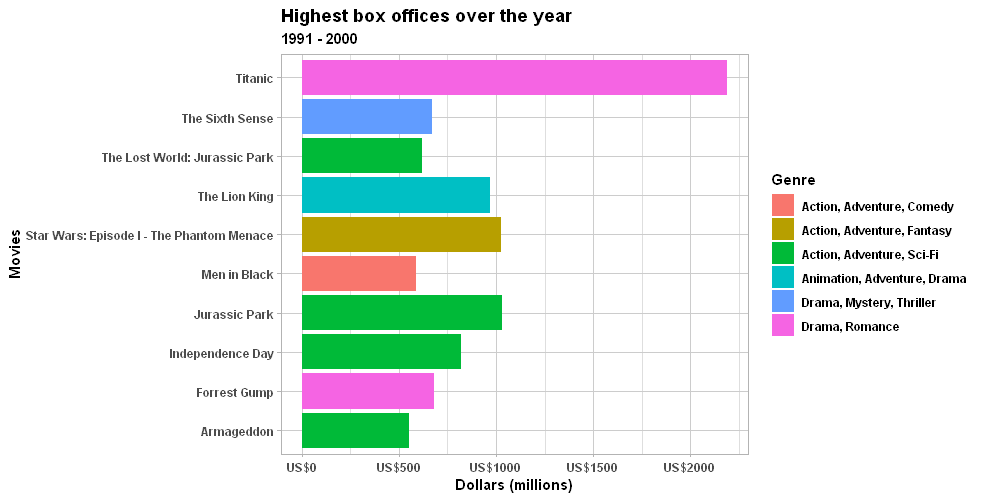

In [21]:
boxoffice_movies(1991,2000,10)

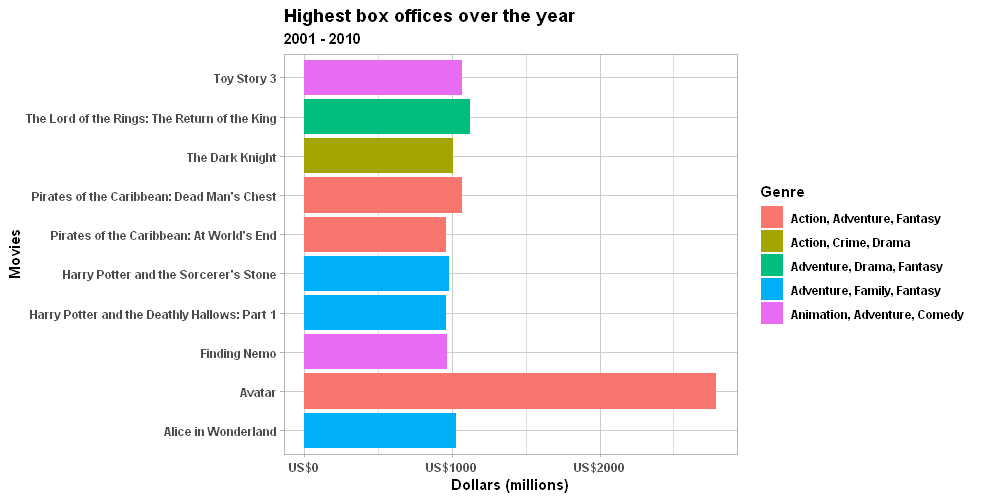

In [22]:
boxoffice_movies(2001,2010,10)

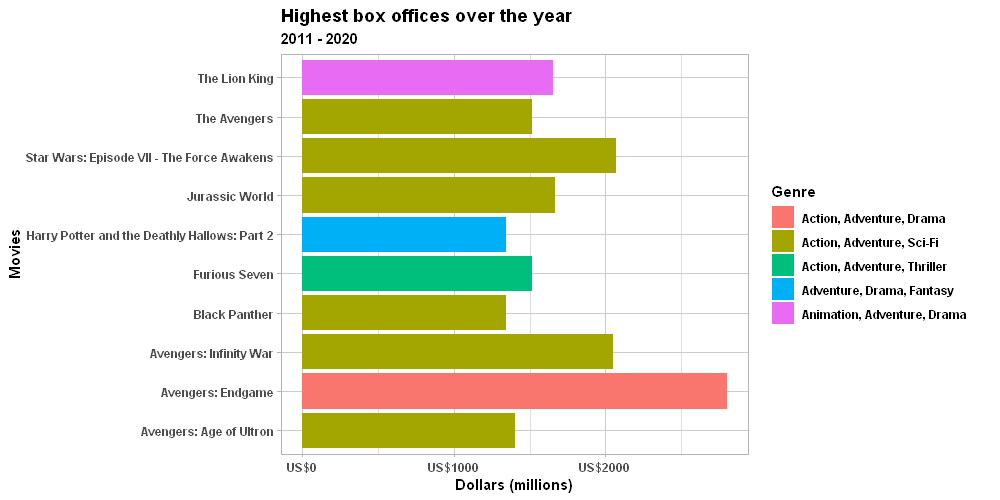

In [23]:
boxoffice_movies(2011,2020,10)

# Relationship between highest box offices with iMDB score 

In [24]:
names <- imdb_movies.omit %>%
                        filter(year %in% seq(1990, 2000)) %>%
                        select(title, worlwide_gross_income, avg_vote) %>%
                        arrange(-avg_vote) %>%
                        head(10) %>%
                        remove_rownames() %>% 
                        column_to_rownames(var="title")
rownames(names)

[1] "The Shawshank Redemption" "Schindler's List"        
 [3] "Pulp Fiction"             "Forrest Gump"            
 [5] "Fight Club"               "Goodfellas"              
 [7] "The Matrix"               "The Silence of the Lambs"
 [9] "Se7en"                    "La vita è bella"

In [25]:
boxoffice_imdbscore <- function(start, end, top){
    names <- imdb_movies.omit %>%
                    filter(year %in% seq(start, end)) %>%
                    select(title, worlwide_gross_income, avg_vote) %>%
                    top_n(top, wt = avg_vote)

    row.names(names) <- names$title
    
    imdb_movies.omit %>%
        filter(year %in% seq(start, end)) %>%
        select(title, worlwide_gross_income, avg_vote) %>%
        top_n(top, wt = avg_vote) %>%
        ggplot(aes(x = worlwide_gross_income, y = avg_vote, color = title)) +
        geom_point(size = 3) +
        geom_text_repel(label = rownames(names)) +
        scale_x_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relationship between highest box offices with iMDB score',
             subtitle = paste0(start, ' - ', end),
            x = 'Dollars (millions)', y = 'iMDB Score',
            color='Movies') +
        coord_flip() +
        theme_perso_col()
}

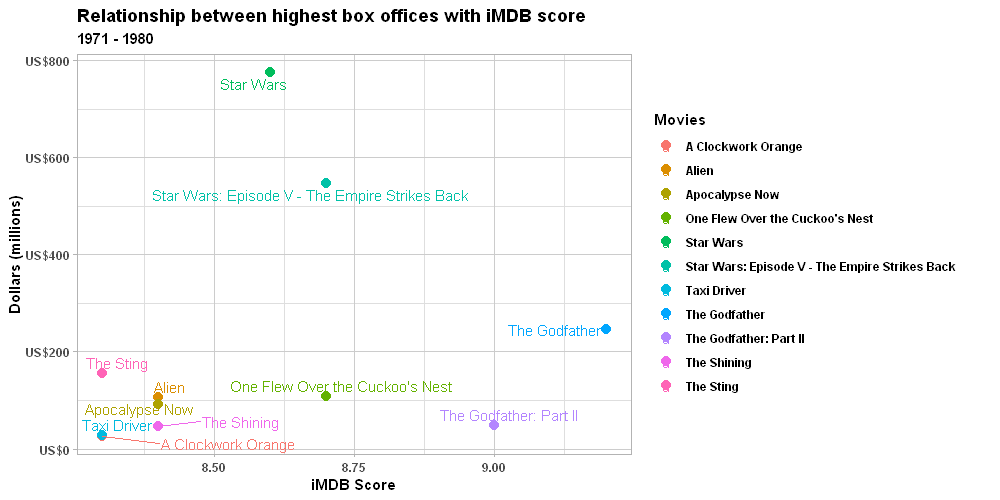

In [26]:
boxoffice_imdbscore(1971,1980,10)

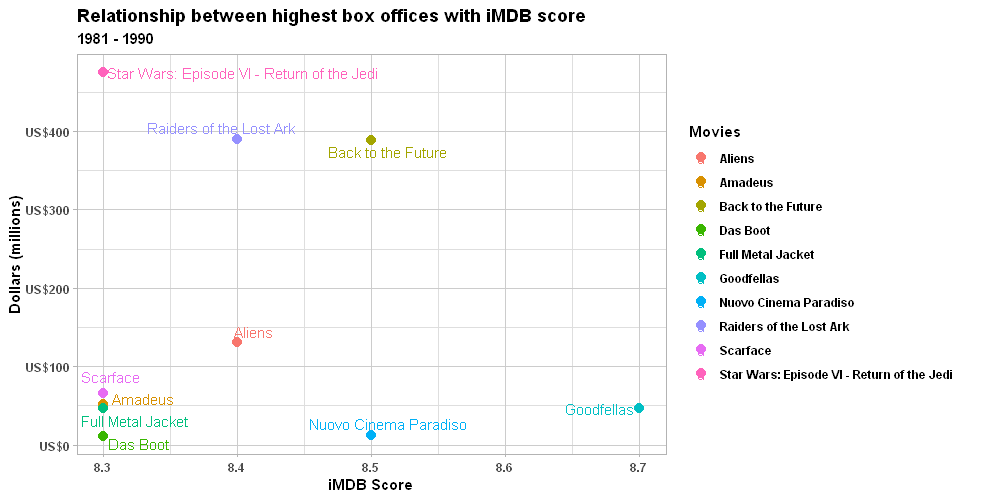

In [27]:
boxoffice_imdbscore(1981,1990,10)

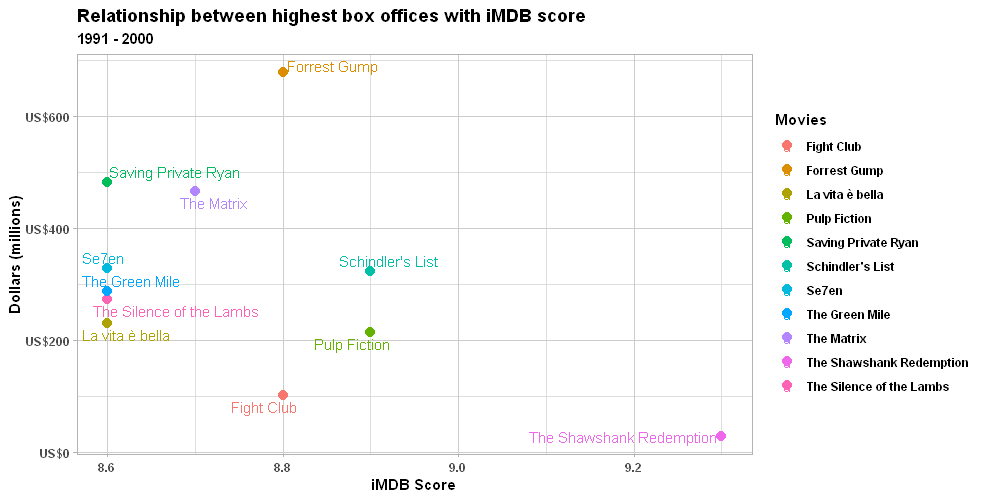

In [28]:
boxoffice_imdbscore(1991,2000,10)

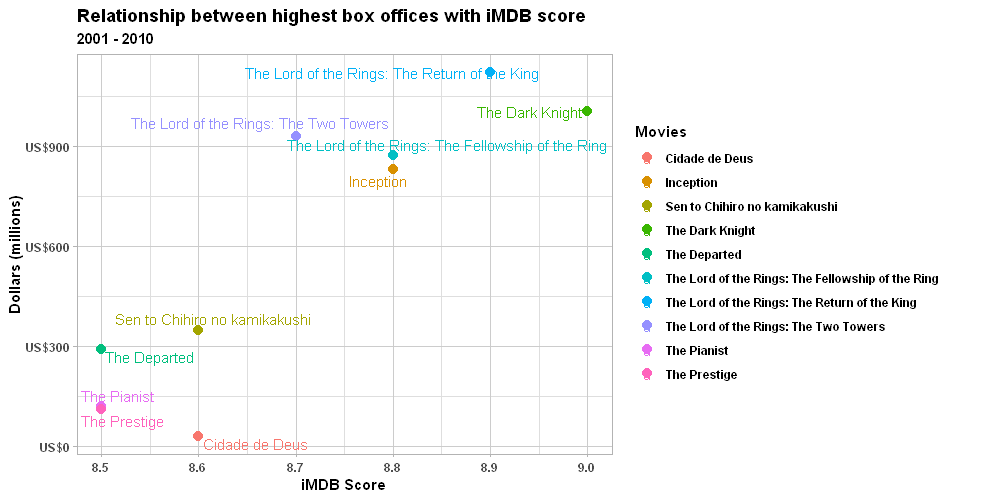

In [29]:
boxoffice_imdbscore(2001,2010,10)

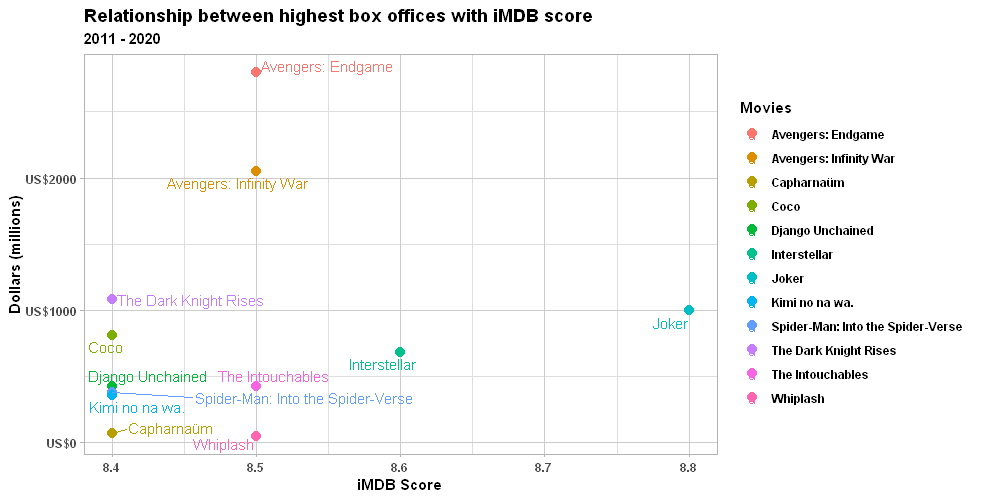

In [30]:
boxoffice_imdbscore(2011,2020,10)

# Oscar

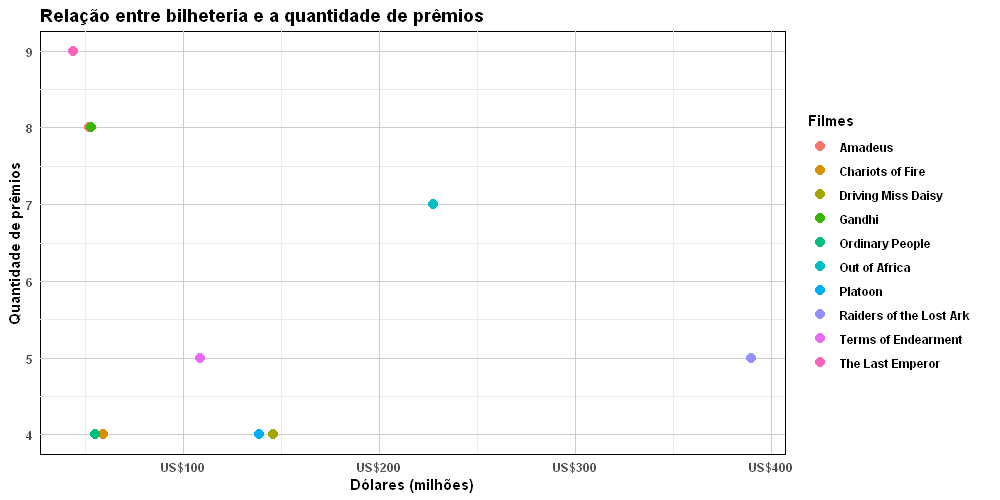

In [31]:
oscar.worlwide_gross_income <- na.omit(oscar_award) %>%
                                inner_join(imdb_movies.omit, by = c('film' = 'title')) %>%
                                filter(year %in% seq(1980,1990) & winner == TRUE) %>%
                                group_by(film, worlwide_gross_income) %>%
                                summarise('awards' = n()) %>%
                                arrange(-awards)

head(oscar.worlwide_gross_income, 10) %>%
        ggplot(aes(x = awards, y = worlwide_gross_income, color = film)) +
        geom_point() +
        geom_point(size = 3) +
        scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relação entre bilheteria e a quantidade de prêmios',
            x = 'Quantidade de prêmios', y = 'Dólares (milhões)',
            color='Filmes') +
        coord_flip() +
        theme_minimal() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

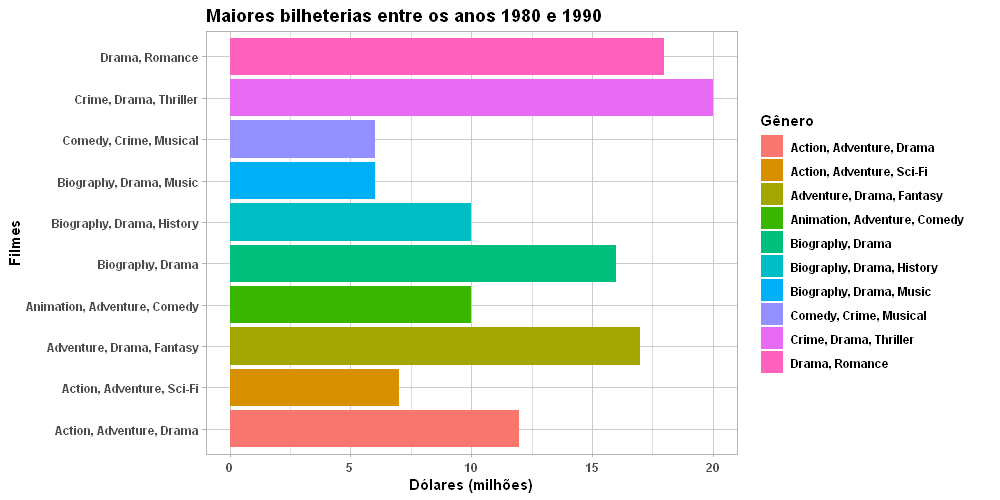

In [32]:
na.omit(oscar_award) %>%
        inner_join(imdb_movies.omit, by = c('film'='title')) %>%
        filter(year %in% seq(2000, 2010) & winner == TRUE) %>%
        group_by(genre) %>%
        summarise('awards' = n()) %>%
        arrange(-awards) %>%
        head(10) %>%
        ggplot(aes(x = genre, y = awards, fill = genre)) +
        geom_bar(stat='identity') +
        labs(title = 'Maiores bilheterias entre os anos 1980 e 1990',
                x = 'Filmes', y = 'Dólares (milhões)',
                fill='Gênero') +
        coord_flip() +
        theme_light() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

# Martin Scorsese

In [33]:
imdb_movies %>%
        select(title, director, avg_vote) %>%
        filter(director %in% 'Martin Scorsese') %>%
        arrange(-avg_vote)

title,director,avg_vote
Goodfellas,Martin Scorsese,8.7
The Irishman,Martin Scorsese,8.7
The Departed,Martin Scorsese,8.5
Taxi Driver,Martin Scorsese,8.3
Raging Bull,Martin Scorsese,8.2
Casino,Martin Scorsese,8.2
The Wolf of Wall Street,Martin Scorsese,8.2
Shutter Island,Martin Scorsese,8.1
The King of Comedy,Martin Scorsese,7.8
After Hours,Martin Scorsese,7.7
